In [91]:
!pip install scikit-learn==0.24.2
# Need this version for SequentialFeatureSelector

In [92]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

import sklearn
print(sklearn.__version__)
sorted(sklearn.metrics.SCORERS.keys())

0.24.2


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [93]:


x1 = np.array([1, 8, 2, 4])
x2 = np.array([3, 5, 10, 12])
y = np.array([11, 12, 15, 20])
data = np.c_[x1, x2, y]
data

array([[ 1,  3, 11],
       [ 8,  5, 12],
       [ 2, 10, 15],
       [ 4, 12, 20]])

In [94]:
df = pd.DataFrame(data, columns=['x1', 'x2', 'y'])
df

,x1,x2,y
0,1,3,11
1,8,5,12
2,2,10,15
3,4,12,20


In [95]:
X = data[:, :-1]
y = data[:, -1]

In [96]:
regr = LinearRegression()
sfs = SequentialFeatureSelector(regr, direction='forward', scoring='neg_mean_squared_error', cv=2)
# sfs = SequentialFeatureSelector(regr, direction='forward', scoring='r2', cv=2)

sfs.fit(X, y)
sfs.support_

array([False,  True])

In [97]:
def custom_feature_select(data, formulas):
  mse_resids = []
  mses = []
  for formula in formulas:
    reg = ols(formula=formula, data=data).fit()
    mse_resids.append(reg.mse_resid)
    y_pred = reg.predict(data)
    mses.append(mean_squared_error(data.y, y_pred))
  
  indexes = (np.argmin(mse_resids), np.argmin(mses))
  return indexes, (formulas[indexes[0]], formulas[indexes[1]])


formulas = ['y ~ 1', 
            "y ~ x1 - 1", 
            "y ~ x1 + 1", 
            "y ~ x2 + 1", 
            "y ~ x2 - 1", 
            "y ~ x1 + x2 + 1", 
            "y ~ x1 + x2 - 1"]
             
custom_feature_select(data=df, formulas=formulas)

((3, 5), ('y ~ x2 + 1', 'y ~ x1 + x2 + 1'))

#Random

In [98]:
rData = np.c_[np.random.randint(0, 10, size=10),
              np.random.randint(0, 10, size=10),
              np.random.randint(0, 10, size=10),] 

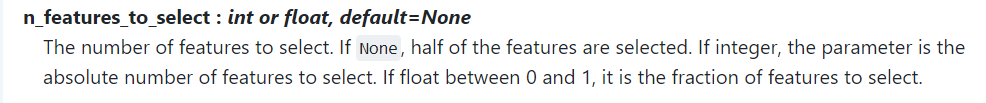

In [99]:

rand_regr = LinearRegression()
rand_sfs = SequentialFeatureSelector(rand_regr, direction='forward', scoring='neg_mean_squared_error', cv=2)
# sfs = SequentialFeatureSelector(regr, direction='forward', scoring='r2', cv=2)

rand_sfs.fit(rData[:, :-1], rData[:, -1])
rand_sfs.support_

array([ True, False])

In [100]:
f = ["y ~ x1 + 1",
     "y ~ x2 + 1"]

rdf = pd.DataFrame(rData, columns=['x1', 'x2', 'y'])
"by mse_resid, by mse", custom_feature_select(data=rdf, formulas=f)

('by mse_resid, by mse', ((1, 1), ('y ~ x2 + 1', 'y ~ x2 + 1')))

#Define custom

In [110]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold

In [111]:
kfold = KFold(n_splits=2)
gen = kfold.split(X, y)
next(gen)

(array([2, 3]), array([0, 1]))

In [101]:

import copy
class CustomFeatureSelector():
  def __init__(model, scoring="nmse", cv=None):
    self.scoring = scoring
    self.model = model
    self.cv = cv
  
  def fit(X, y):
    model = copy.deepcopy(self.model)
    if self.cv:
      cv = KFold(n_splits=self.cv)
    ...